# FIFA 2019 Player Data

## Goal:
1. Load, clean, and explore data based on:

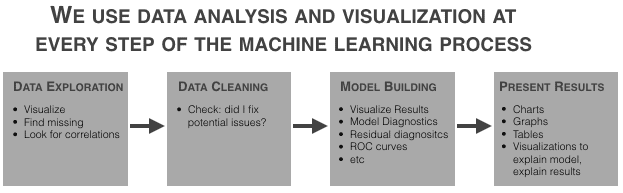

2. Questions to explore:
    * Which players get paid more - left footed or right footed?
    * Does height or weight depend on overall quality or wage?
    * Does it pay more to have potential or value?

### Addition Information:
The file is 8.72Mb with 18.2k rows, and 89 columns.

https://www.kaggle.com/karangadiya/fifa19/download


In [28]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Get the dataset
fifa_19_df = pd.read_csv('FIFA_data.csv', index_col=0)
print(fifa_19_df.shape)
fifa_19_df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [5]:
# More Information
fifa_19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [6]:
fifa_19_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [7]:
# Using info above to decide which columns to delete
del_cols = ['Photo', 'Flag', 'Club Logo', 'Special', 'Skill Moves', 'Real Face', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'ID', 'Work Rate', 'Body Type', 'Joined']

Deleting columns that aren't useful
* https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/

In [8]:
# Deleting unneeded columns
fifa_19_df1 = fifa_19_df.drop(columns=del_cols, index=0)
fifa_19_df1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Height,Weight
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,ST,7.0,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,LW,10.0,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,GK,1.0,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,RCM,7.0,5'11,154lbs
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,LF,10.0,5'8,163lbs


## Checking Missing Values ##

*Sources:*
* https://www.kaggle.com/alexisbcook/handling-missing-values
* https://realpython.com/python-data-cleaning-numpy-pandas/
* https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

In [9]:
#Missing Values 
missing_value_count = fifa_19_df1.isnull().sum()
percent_missing = (fifa_19_df1.isnull().sum()/fifa_19_df1.isnull().count())
#Create a table of total missing next to percentage missing
missing_data = pd.concat([missing_value_count, percent_missing], axis=1, keys=['Total', 'Percent Missing']) 
missing_data

,Total,Percent Missing
Name,0,0.000000
Age,0,0.000000
Nationality,0,0.000000
Overall,0,0.000000
Potential,0,0.000000
Club,241,0.013237
Value,0,0.000000
Wage,0,0.000000
Preferred Foot,48,0.002636
International Reputation,48,0.002636


In [10]:
fifa_19_df2 = fifa_19_df1.dropna(how='any', subset=['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Position', 'Jersey Number', 'Height', 'Weight'])
fifa_19_df2.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

## Data Cleaning 
*Source:*
* https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners#3.CLEANING-DATA
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
* https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455

In [11]:
fifa_19_df2.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Height,Weight
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,ST,7.0,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,LW,10.0,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,GK,1.0,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,RCM,7.0,5'11,154lbs
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,LF,10.0,5'8,163lbs


In [12]:
# Create functions for cleaning
def weight_change(weight):
    new_weight = weight.replace('lbs', '')
    return int(new_weight)

def currency_exchange(euro):
    dollar = euro.replace('€', '')
    if 'M' in dollar:
        dollar = (float(dollar.replace('M', ''))*1000000)*1.18 #euro to dollar exchange rate
    elif 'K' in dollar:
        dollar = (float(dollar.replace('K', ''))*1000)*1.18
    return float(dollar)

def height_change(height):
    s = height.split("'")
    new_height = (int(s[0])*12) + int(s[1])
    return new_height

In [13]:
# Applying functions
fifa_19_df2['Weight_lbs'] = fifa_19_df2['Weight'].apply(lambda x : weight_change(x))
fifa_19_df2['Height_in'] = fifa_19_df2['Height'].apply(lambda x : height_change(x))
fifa_19_df2['Value_exchange'] = fifa_19_df2['Value'].apply(lambda x: currency_exchange(x))
fifa_19_df2['Wage_exchange'] = fifa_19_df2['Wage'].apply(lambda x: currency_exchange(x))
fifa_19_df2.head()

<ipython-input-13-6d0475db1249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_19_df2['Weight_lbs'] = fifa_19_df2['Weight'].apply(lambda x : weight_change(x))
<ipython-input-13-6d0475db1249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_19_df2['Height_in'] = fifa_19_df2['Height'].apply(lambda x : height_change(x))
<ipython-input-13-6d0475db1249>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Height,Weight,Weight_lbs,Height_in,Value_exchange,Wage_exchange
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,ST,7.0,6'2,183lbs,183,74,90860000.0,477900.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,LW,10.0,5'9,150lbs,150,69,139830000.0,342200.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,GK,1.0,6'4,168lbs,168,76,84960000.0,306800.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,RCM,7.0,5'11,154lbs,154,71,120360000.0,418900.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,LF,10.0,5'8,163lbs,163,68,109740000.0,401200.0


## Exploring the questions:

### Which players get paid more - left footed or right footed?

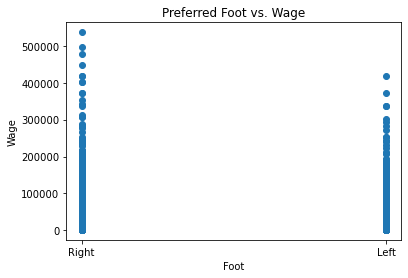

In [14]:
# First Vis
plt.scatter(fifa_19_df2['Preferred Foot'], fifa_19_df2['Wage_exchange'])
plt.title('Preferred Foot vs. Wage')
plt.xlabel('Foot')
plt.ylabel('Wage')
plt.show()

Initial scatter plot shows right footed players may earn more. Let's look at a histogram to further explore

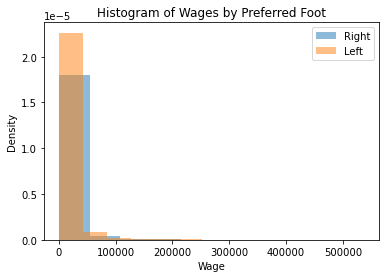

In [16]:
# Second vis 
plt.hist(fifa_19_df2['Wage_exchange'][fifa_19_df2['Preferred Foot'] == 'Right'], alpha=0.5, label='Right', density=True)
plt.hist(fifa_19_df2['Wage_exchange'][fifa_19_df2['Preferred Foot'] == 'Left'], alpha=0.5, label='Left', density=True,)
plt.title('Histogram of Wages by Preferred Foot')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.legend()
plt.show()

**Reactions**

It appears that left footed plays tend to make less than right footed players. Possible explanations:
* Significantly more right foot players
* Left footed players are not as good (seems unlikely...) 

In [17]:
fifa_19_df2['Preferred Foot'].value_counts()

Right    13756
Left      4161
Name: Preferred Foot, dtype: int64

### Does overall quality (rating) or wage depend on height or weight?

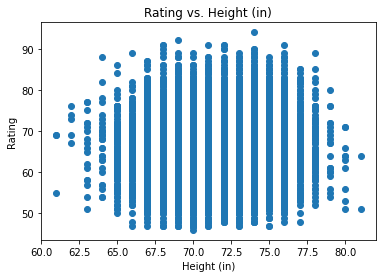

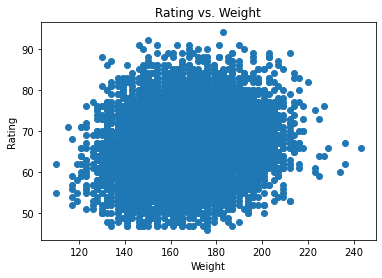

In [21]:
# Scatter plots ratings vs. height & weight
plt.scatter(fifa_19_df2['Height_in'], fifa_19_df2['Overall'])
plt.title('Rating vs. Height (in)')
plt.xlabel('Height (in)')
plt.ylabel('Rating')
plt.show()
plt.scatter(fifa_19_df2['Weight_lbs'], fifa_19_df2['Overall'])
plt.title('Rating vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Rating')
plt.show()

### Reactions ###

The Scatter plots of ratings compared to height and weight reveal players tend to be better when they are 66-76 inches tall (almost a foot in variation!) and are between 150-190 lbs. Players that are smaller or much larger tend to be lower on the rating scale. 

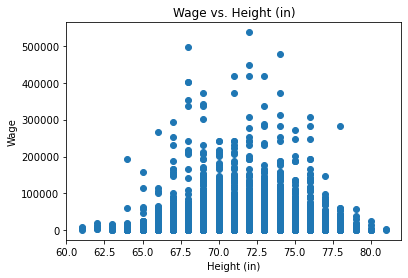

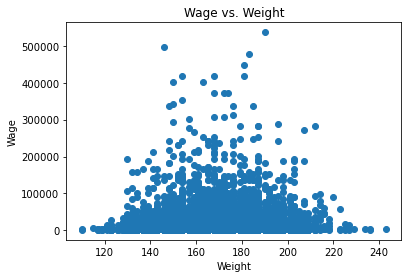

In [22]:
# Scatter plots of Wage vs. Height & Weight
plt.scatter(fifa_19_df2['Height_in'], fifa_19_df2['Wage_exchange'])
plt.title('Wage vs. Height (in)')
plt.xlabel('Height (in)')
plt.ylabel('Wage')
plt.show()
plt.scatter(fifa_19_df2['Weight_lbs'], fifa_19_df2['Wage_exchange'])
plt.title('Wage vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Wage')
plt.show()

### Reactions ###

There seems to be a more distinguisable distribution for Wage compared to height and weight. Players seem to earn more when they are again between 66-76 inches tall and 150-190lbs. 

Possible explanation: 
* Smaller players aren't as strong or fast 
* Larger players might not have as much stamina

### Does it pay more to have potential or value?

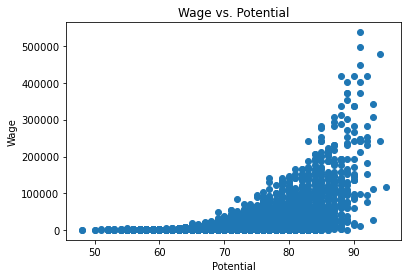

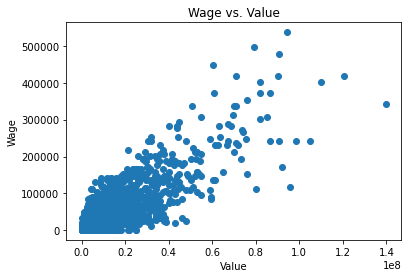

In [23]:
# Scatter plots of wage vs. potential & value
plt.scatter(fifa_19_df2['Potential'], fifa_19_df2['Wage_exchange'])
plt.title('Wage vs. Potential')
plt.xlabel('Potential')
plt.ylabel('Wage')
plt.show()
plt.scatter(fifa_19_df2['Value_exchange'], fifa_19_df2['Wage_exchange'])
plt.title('Wage vs. Value')
plt.xlabel('Value')
plt.ylabel('Wage')
plt.show()

### Reactions ###

Both have a positive coorelation. Teams seem to be willing to pay more for a players value than potential, which makes sense. However, the plots show how even the best potential and value does not always equate to how much the player actually makes. 